# Análisis de datos

## Diccionario de datos

Variable 	Definition 	Key

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / childers aboard the Tatinic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
is_home_run 	si es home run o no 	0 = No, 1 = Si

## Notas sobre las variables

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch = The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

launch_speed:

launch_angle:

out_when_up:

park:

balls:

is_batter_left:



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
train = pd.read_csv('./train.csv')

## Descripción general de los datos

In [4]:
train.shape

(46244, 25)

In [6]:
train.drop_duplicates().shape

(46244, 25)

In [7]:
train.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,1,2020-08-26,ARI,COL,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,0,1,2,-0.15,1.97,87.8,108.9,9.0,0
1,2,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,1,3,1,-0.71,2.88,95.2,NaN,18.0,0
2,3,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,3,0,1,2,-0.54,1.75,86.5,75.0,49.0,0
3,4,2020-08-26,ARI,COL,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,0,0,2,-0.42,3.15,86.7,90.6,54.0,0
4,5,2020-08-10,COL,ARI,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,1,1,0,0.18,3.27,96.1,NaN,6.0,0


In [9]:
train.describe()

,bip_id,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
count,46244.000000,46244.00000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,46244.000000,34439.000000,34459.000000,46244.000000
mean,61886.135693,585994.82229,592001.279993,0.421071,0.273419,14.423709,4.830097,0.960860,1.124124,1.107884,-0.005890,2.323522,88.860602,88.038189,12.477263,0.052915
std,37002.379194,65617.97127,65743.959401,0.493736,0.445719,8.672130,2.523844,0.818038,1.017073,0.808433,0.542757,0.571431,5.924192,14.791351,28.890217,0.223866
min,1.000000,405395.00000,424144.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.060000,-0.140000,70.000000,7.500000,-89.000000,0.000000
25%,27981.000000,543592.00000,545064.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,-0.390000,1.930000,84.700000,79.700000,-5.000000,0.000000
50%,64002.500000,596129.00000,605525.000000,0.000000,0.000000,14.000000,5.000000,1.000000,1.000000,1.000000,-0.010000,2.310000,89.700000,90.900000,13.000000,0.000000
75%,94694.500000,642082.00000,643290.000000,1.000000,1.000000,22.000000,7.000000,2.000000,2.000000,2.000000,0.380000,2.720000,93.600000,99.000000,31.000000,0.000000
max,119520.000000,680777.00000,685493.000000,1.000000,1.000000,29.000000,13.000000,2.000000,3.000000,2.000000,2.200000,4.740000,102.800000,118.400000,90.000000,1.000000


In [11]:
train.isnull().sum()

bip_id                  0
game_date               0
home_team               0
away_team               0
batter_team             0
batter_name             0
pitcher_name            0
batter_id               0
pitcher_id              0
is_batter_lefty         0
is_pitcher_lefty        0
bb_type                 6
bearing                 0
pitch_name              0
park                    0
inning                  0
outs_when_up            0
balls                   0
strikes                 0
plate_x                 0
plate_z                 0
pitch_mph               0
launch_speed        11805
launch_angle        11785
is_home_run             0
dtype: int64

<Axes: >

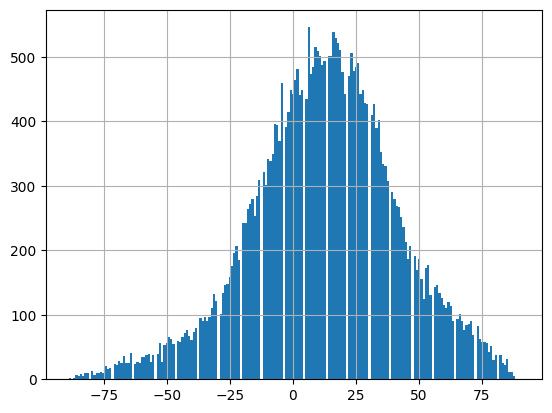

In [13]:
train.launch_angle.hist(bins=200)

<Axes: ylabel='Density'>

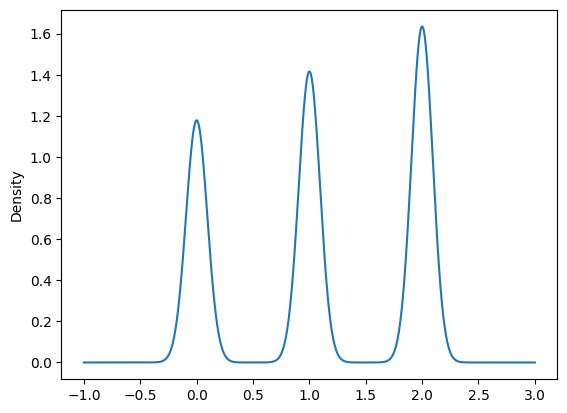

In [14]:
train.strikes.plot(kind='kde')

In [19]:
stats.shapiro(train.launch_angle.dropna())[1]

8.868638352633677e-33

park
0     Axes(0.125,0.11;0.775x0.77)
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
13    Axes(0.125,0.11;0.775x0.77)
14    Axes(0.125,0.11;0.775x0.77)
15    Axes(0.125,0.11;0.775x0.77)
16    Axes(0.125,0.11;0.775x0.77)
17    Axes(0.125,0.11;0.775x0.77)
18    Axes(0.125,0.11;0.775x0.77)
19    Axes(0.125,0.11;0.775x0.77)
20    Axes(0.125,0.11;0.775x0.77)
21    Axes(0.125,0.11;0.775x0.77)
22    Axes(0.125,0.11;0.775x0.77)
23    Axes(0.125,0.11;0.775x0.77)
24    Axes(0.125,0.11;0.775x0.77)
25    Axes(0.125,0.11;0.775x0.77)
26    Axes(0.125,0.11;0.775x0.77)
27    Axes(0.125,0.11;0.775x0.77)
28    Axes(0.125,0.11;0.775x0.77)
29    Axe

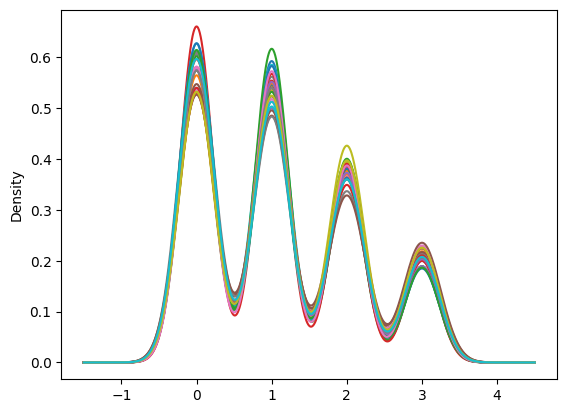

In [21]:
train.groupby('park')['balls'].plot(kind='kde')

## Qué tipos de datos tienen las variables?

In [23]:
train.dtypes

bip_id                int64
game_date            object
home_team            object
away_team            object
batter_team          object
batter_name          object
pitcher_name         object
batter_id             int64
pitcher_id            int64
is_batter_lefty       int64
is_pitcher_lefty      int64
bb_type              object
bearing              object
pitch_name           object
park                  int64
inning                int64
outs_when_up          int64
balls                 int64
strikes               int64
plate_x             float64
plate_z             float64
pitch_mph           float64
launch_speed        float64
launch_angle        float64
is_home_run           int64
dtype: object

In [24]:
train.sample(4)

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
16326,43193,2020-09-13,TB,BOS,BOS,"chavis, michael","morton, charlie",656308,450203,0,...,4,2,0,1,-0.58,1.69,93.4,101.0,-2.0,0
11041,26547,2020-09-07,CLE,KC,KC,"franco, maikel","cimber, adam",596748,643256,0,...,8,1,0,1,-0.27,2.50,85.4,102.4,-1.0,0
35740,97427,2020-09-26,CLE,PIT,PIT,"moran, colin","civale, aaron",592567,650644,1,...,3,0,2,2,-0.09,1.08,74.9,90.6,4.0,0
23097,63919,2020-07-26,OAK,LAA,LAA,"goodwin, brian","soria, joakim",571718,465657,1,...,7,1,0,2,-0.48,3.38,93.2,88.8,NaN,0


## ¿Cuál fue la proporción de sobrevivientes sobre el total?

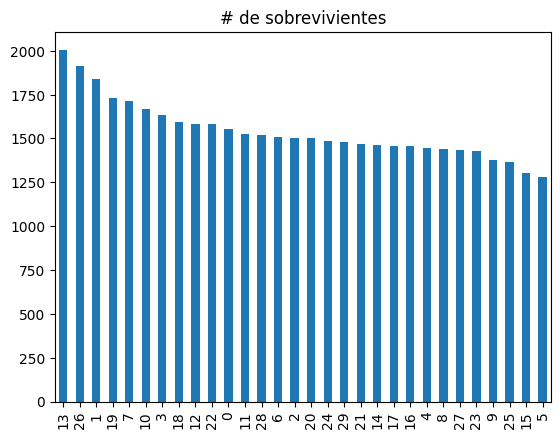

In [25]:
train.park.value_counts().plot.bar(title='# de sobrevivientes');

## ¿Y si disociamos por clase?

In [31]:
classes = train.p_class.unique()
classes.sort()

for c in classes:
    train[train.is_home_run == c].survived.value_counts(normalize=True).sort_index().plot.bar(title=f'% de sobrevivientes (clase {c})')
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'p_class'

In [34]:
train[(train.home_team == 'TB')].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de mujeres que sobrevivieron');

AttributeError: 'DataFrame' object has no attribute 'hometeam'

In [36]:
train['children'] = train.age <= 8

AttributeError: 'DataFrame' object has no attribute 'age'

In [37]:
train[(train.children == True)].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de niños que sobrevivieron')

AttributeError: 'DataFrame' object has no attribute 'children'

In [38]:
full[(full.children == False)].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de adultos que sobrevivieron')

NameError: name 'full' is not defined

## ¿Existe alguna relación entre el equipo local y sus probabilidades de hacer home run?

<Axes: title={'center': '% de home run por equipo local'}>

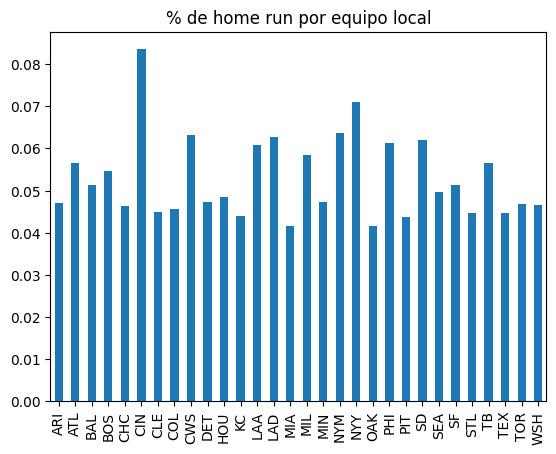

In [73]:
(train[train.is_home_run == True].home_team.value_counts() / train.home_team.value_counts()).plot.bar(title='% de home run por equipo local')

In [74]:
train[train.launch_speed.notnull()].launch_speed.sample(4)

8330      92.2
43565    104.9
6815      74.8
33624     92.0
Name: launch_speed, dtype: float64

In [46]:
train['home_letter'] = train.home_team.str.strip().str[:1]

In [49]:
print('Porcentaje de valores nulos: {} %'.format(round(sum(train.home_letter.isnull()) / train.shape[0] * 100, 2)))

Porcentaje de valores nulos: 0.0 %


AttributeError: 'DataFrame' object has no attribute 'p_class'

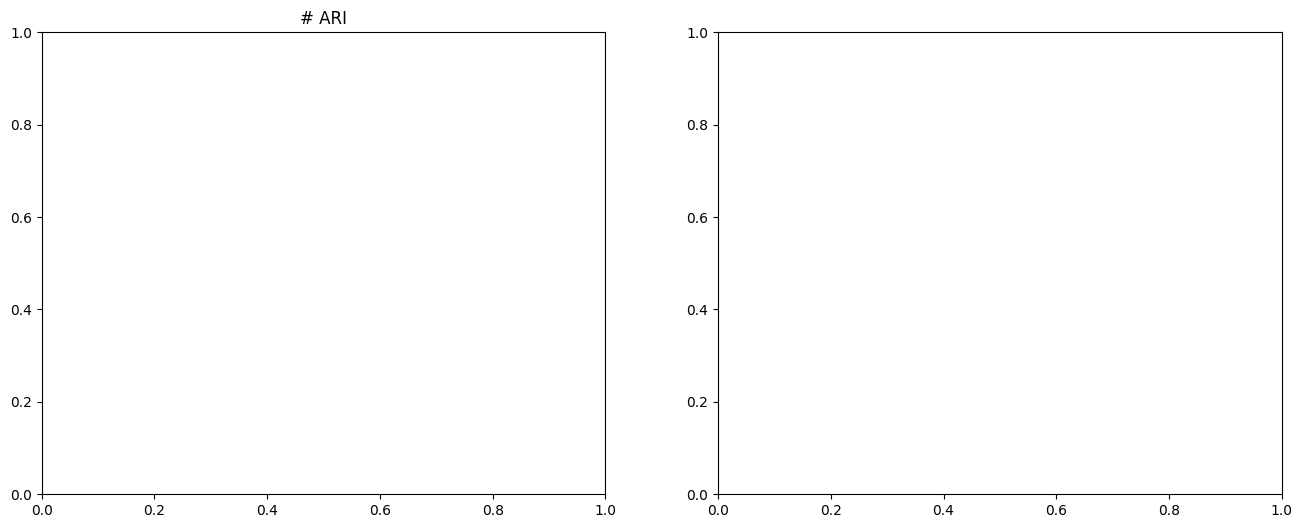

In [55]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_title('# No es home run')
train[train.home_team == '0'].p_class.value_counts().sort_index().plot.pie(ax=ax[0], autopct='%1.0f%%')
ax[1].set_title('# Es home run')
train[train.is_home_run == '1'].p_class.value_counts().sort_index().plot.pie(ax=ax[1], autopct='%1.0f%%')

In [56]:
train[train.launch_angle.notnull()][["p_class", "fare"]].boxplot(by='launch_angle', figsize=(8, 6));

KeyError: "None of [Index(['p_class', 'fare'], dtype='object')] are in the [columns]"

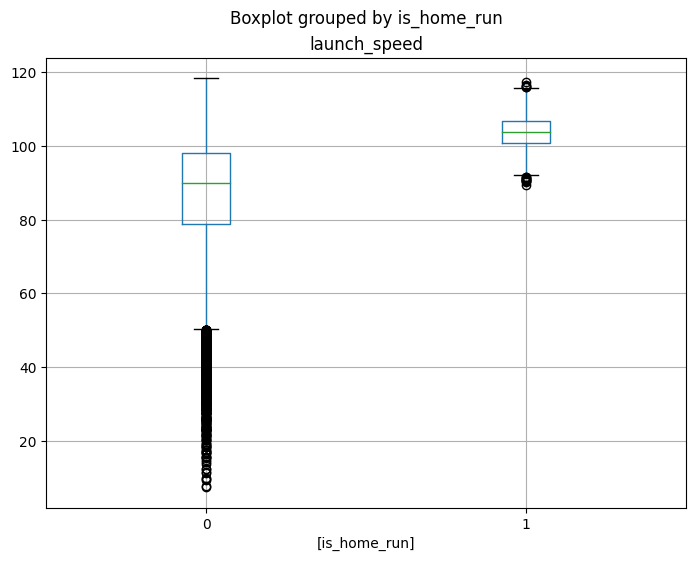

In [59]:
train[train.launch_speed.notnull()][["is_home_run", "launch_speed"]].boxplot(by='is_home_run', figsize=(8, 6));

In [61]:
train.corr()

/tmp/ipykernel_3664/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,bip_id,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
bip_id,1.000000,0.037723,-0.014333,-0.013866,0.009507,-0.047973,0.058626,0.003746,0.011892,-0.002493,0.010955,0.005578,-0.075954,0.013894,-0.007721,0.010680
batter_id,0.037723,1.000000,-0.004120,0.001368,0.004676,0.015760,0.010128,-0.012997,0.003953,0.008792,-0.010780,-0.008769,-0.009631,-0.010486,-0.022710,0.001247
pitcher_id,-0.014333,-0.004120,1.000000,0.017636,-0.028759,-0.026735,-0.025624,0.002063,0.006641,-0.000568,-0.013314,0.017487,0.122665,0.009070,0.000915,0.006060
is_batter_lefty,-0.013866,0.001368,0.017636,1.000000,-0.167445,-0.003583,-0.006380,-0.009630,0.027046,0.009496,-0.121256,-0.017705,0.022419,-0.022963,-0.003804,-0.015527
is_pitcher_lefty,0.009507,0.004676,-0.028759,-0.167445,1.000000,0.010359,-0.057838,-0.008725,0.008328,0.006236,0.071787,-0.001313,-0.145044,-0.021782,-0.016621,-0.001313
park,-0.047973,0.015760,-0.026735,-0.003583,0.010359,1.000000,-0.009862,0.001545,0.005980,0.001848,-0.003562,0.005362,-0.000670,0.002011,0.000035,-0.004843
inning,0.058626,0.010128,-0.025624,-0.006380,-0.057838,-0.009862,1.000000,0.001597,-0.013123,-0.005748,-0.007223,0.010945,0.053831,-0.006699,-0.006006,-0.020142
outs_when_up,0.003746,-0.012997,0.002063,-0.009630,-0.008725,0.001545,0.001597,1.000000,0.014832,-0.003163,0.000716,-0.022347,0.005874,0.000277,-0.000169,-0.011835
balls,0.011892,0.003953,0.006641,0.027046,0.008328,0.005980,-0.013123,0.014832,1.000000,0.403989,0.005130,-0.006764,0.083133,0.063073,0.027358,0.017501
strikes,-0.002493,0.008792,-0.000568,0.009496,0.006236,0.001848,-0.005748,-0.003163,0.403989,1.000000,0.033017,-0.033492,-0.066390,-0.032572,-0.019771,-0.034292


/tmp/ipykernel_3664/2469592024.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


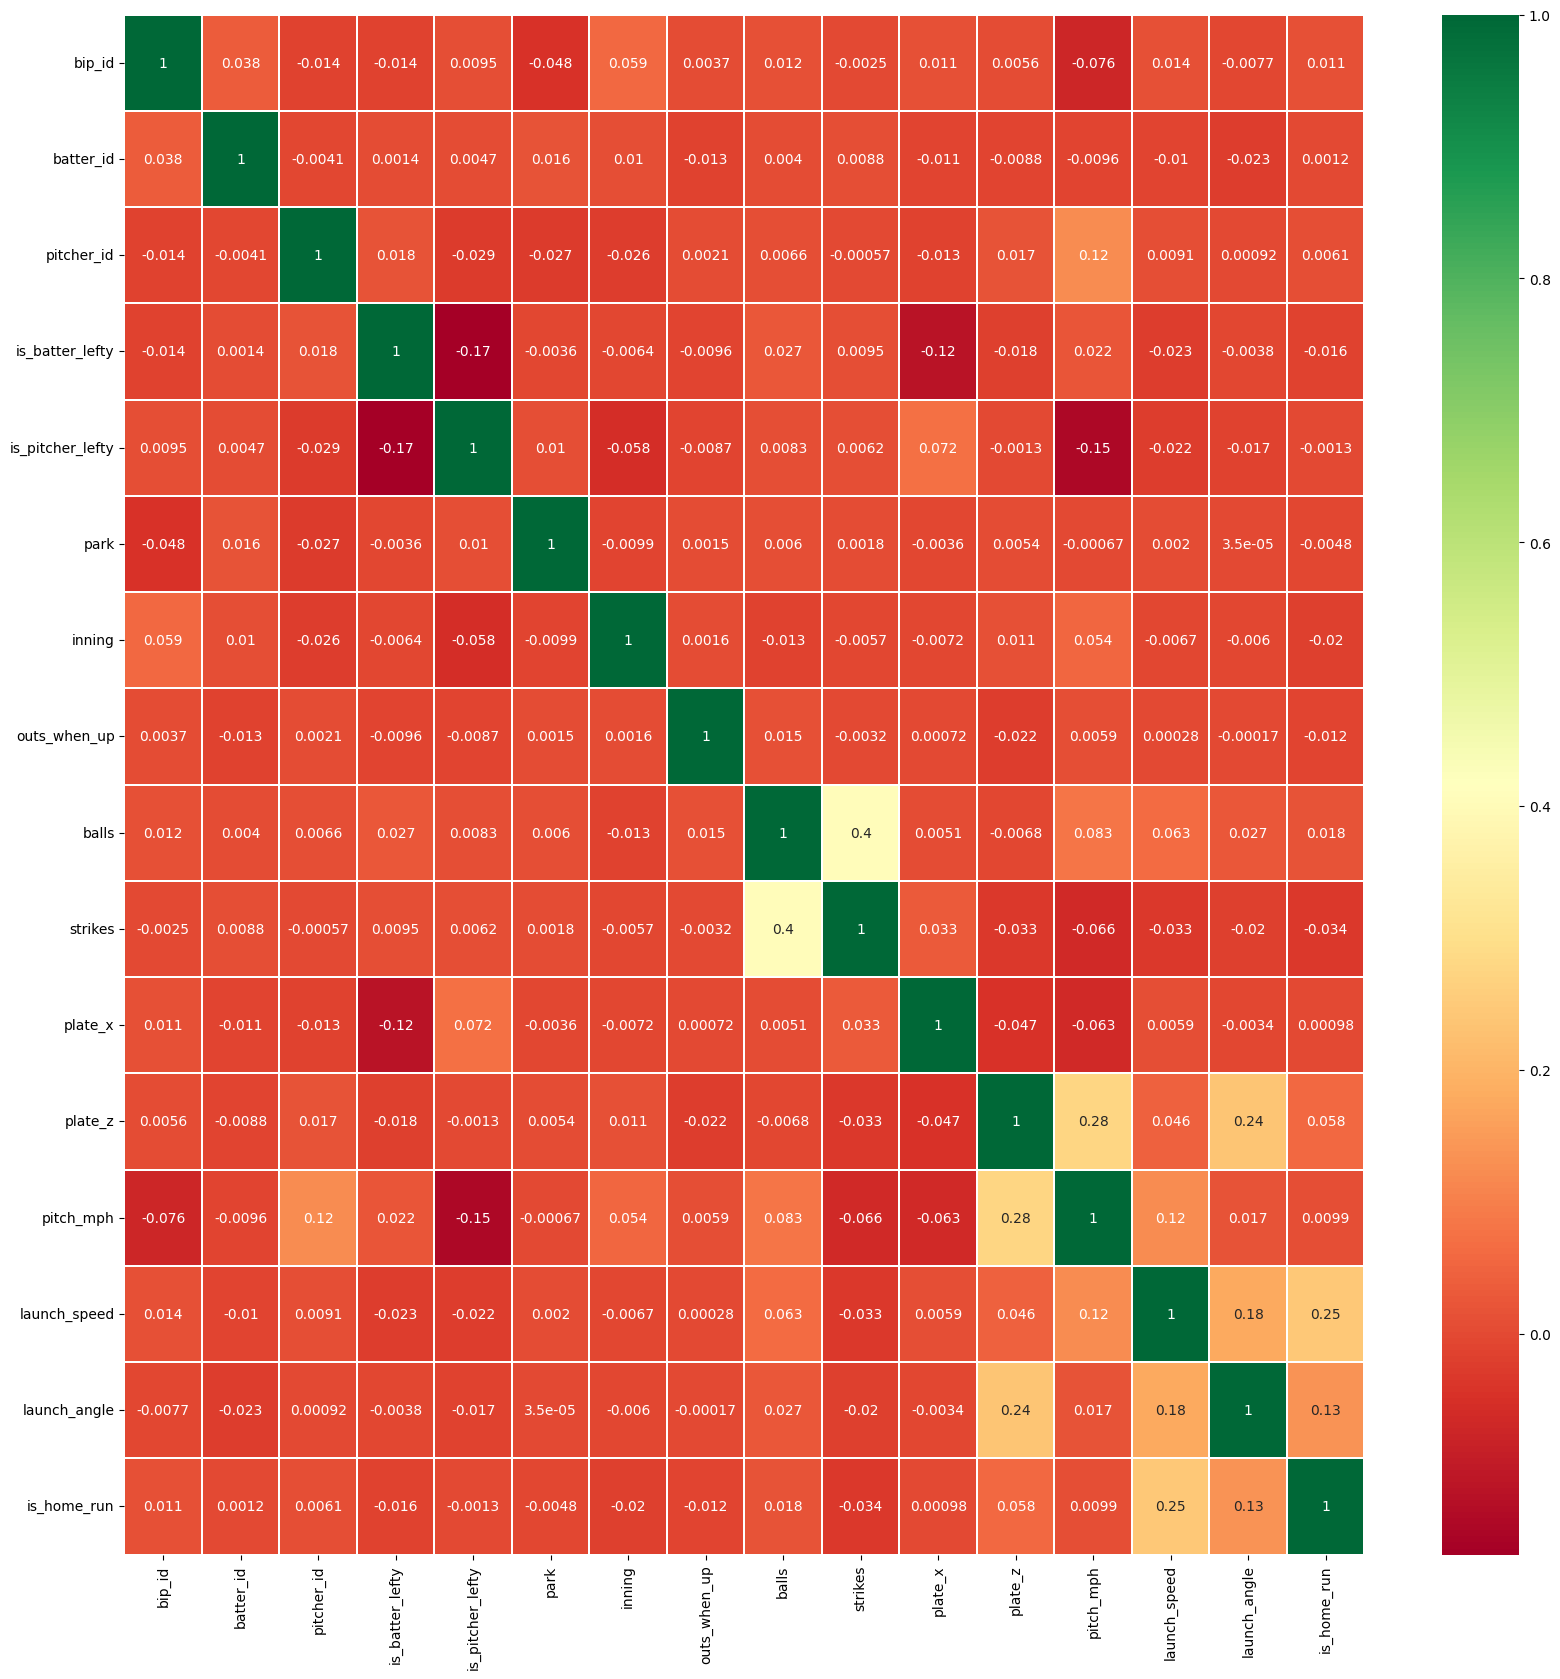

In [66]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()